# Procesamiento de Lenguaje Natural - **Formato de datos**

En esta notebook vamos a jugar con diferentes fuentes de datos, recordando cómo cargar y acceder a distintos tipos de datos.

En particular, vamos a ver:

*   Obtener archivos desde una url.
*   Acceder y recorrer un archivo ``.csv``.
*   Acceder y recorrer un archivo ``.xml``.
*   Acceder al contenido de un archivo ``.zip``.
*   Acceder y recorrer un archivo ``.json``.

Nota. Los archivos son todos de ejemplo, y no son los que necesitan utilizar para ninguno de los prácticos.

In [ ]:
import functools
import pathlib
import shutil
import requests
from tqdm.auto import tqdm as tqdmauto
import requests
import os

### Obtener archivos desde una url

Esta semana vimos como acceder al contenido de un sitio web. 

Por ejemplo, para acceder al contenido de la página de Wikipedia correspondiente a Londres, vimos que podíamos hacer:

In [2]:
data = requests.get('https://en.wikipedia.org/wiki/London')
content = data.content

print(content)

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>London - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"12ab8c52-baa9-4e09-bf4c-80f6dbaa86b8","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"London","wgTitle":"London","wgCurRevisionId":1023432301,"wgRevisionId":1023432301,"wgArticleId":17867,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with non-numeric formatnum arguments","Webarchive template wayback links","Wikipedia articles incorporating a citation from the 1911 Encyclopaedia Britannica with Wikisource ref

Sin embargo, eso no nos permite guardar el contenido en un archivo. En el caso en que querramos guardar el archivo que estamos accediendo (por ejemplo, un archivo almacenado en un GitHub). Vamos a tomar como ejemplo un archivo ``.csv`` que se encuentra en GitHub y que contiene un dataset para la detección de Hate Speech.

Vamos a agregar un método auxiliar para realizar las descargar y observar el progreso:

In [1]:
def download_file(url, filename):    
    r = requests.get(url, stream=True, allow_redirects=True)
    if r.status_code != 200:
        r.raise_for_status()  # Will only raise for 4xx codes, so...
        raise RuntimeError(f"Request to {url} returned status code {r.status_code}")
    file_size = int(r.headers.get('Content-Length', 0))

    path = pathlib.Path(filename).expanduser().resolve()
    path.parent.mkdir(parents=True, exist_ok=True)

    desc = "(Unknown total file size)" if file_size == 0 else ""
    r.raw.read = functools.partial(r.raw.read, decode_content=True)  # Decompress if needed
    with tqdmauto.wrapattr(r.raw, "read", total=file_size, desc=desc) as r_raw:
        with path.open("wb") as f:
            shutil.copyfileobj(r_raw, f)

    return path

In [3]:
url = "https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv"
datapath = "labeled_data.csv" # se puede incluir estructura de carpetas

download_file(url,datapath)

WindowsPath('C:/Users/Anto/Dropbox/cursos/2021-nlp-duia/labeled_data.csv')

Notar que al no haber vinculado la notebook a nuestra cuenta de Drive, los archivos serán descargados en el espacio asignado a la notebook, accesible haciendo click en la carpetita que aparece en la barra de menú vertical de la izquierda. En consecuencia, el tiempo de persistencia de estos archivos será el mismo que el de vida de la notebook.

### Acceder y recorrer un archivo ``.csv`` 

Los archivos ``.csv`` pueden ser directamente almacenados en un ``DataFrame`` de ``pandas``. 
Para ello, solo es necesario definir la ubicación del archivo y las columnas de dicho archivo a utilizar. Por ejemplo, considerando el ``.csv`` que descargamos anteriormente, vamos a quedarnos con las columnas ``class`` y ``tweet``.

In [8]:
import pandas as pd

In [14]:
url = "labeled_data.csv"
df = pd.read_csv(url,usecols=['class', 'tweet']) # de todas las columnas que tiene el dataset, nos vamos a quedar solo con el texto y la clase

df

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


En el ejemplo anterior utilizamos el archivo que habíamos descargado previamente, sin embargo, ``pandas`` también soporta que se le pase una ``url`` como parámetro. Entonces, si quisieramos cargar los datos del mismo archivo, pero sin tenerlo previamente descargado, podríamos hacer:

In [16]:
url = "https://raw.githubusercontent.com/t-davidson/hate-speech-and-offensive-language/master/data/labeled_data.csv"
df = pd.read_csv(url, usecols=['class', 'tweet']) # de todas las columnas que tiene el dataset, nos vamos a quedar solo con el texto y la clase

df

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


Si quisiéramos, en lugar de delegar la conversión de los records del ``.csv`` en ``pandas``, podríamos recorrerlo y procesarlo de forma manual utilizando 

In [18]:
import csv

In [22]:
reader = csv.DictReader(open("labeled_data.csv"))

with open('labeled_data.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    print("header: ",reader.fieldnames)
    next(csvreader) # salteando el header
    for row in csvreader:
            print('-',row[6].replace('\n','')) # accedemos al texto del tweet

header:  ['', 'count', 'hate_speech', 'offensive_language', 'neither', 'class', 'tweet']
- !!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out...
- !!!!! RT @mleew17: boy dats cold...tyga dwn bad for cuffin dat hoe in the 1st place!!
- !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby4life: You ever fuck a bitch and she start to cry? You be confused as shit
- !!!!!!!!! RT @C_G_Anderson: @viva_based she look like a tranny
- !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you hear about me might be true or it might be faker than the bitch who told it to ya &#57361;
- !!!!!!!!!!!!!!!!!!"@T_Madison_x: The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes! &#128514;&#128514;&#128514;"
- !!!!!!"@__BrighterDays: I can not just sit up and HATE on another bitch .. I got too much shit going on!"
- !!!!&#8220;@selfiequeenbri: cause I'm tired of you big bitches coming for us skin

- #MyUnpopularOpinion Spanish bitches suck dick by 11 and have babies by 15 because they're already fine and dressing slutty.
- #NL Q.U.E.E.N. And reminded: I still don't get why Janelle Monae is so perplexed that people think she's queer...
- #NP "Centuries" ~FOB
- #NationalCatDay ...sure. Celebrate over 1 BILLION bird deaths and blame it on #climatechange you fuckin' #commies.
- #Natitude? Okay. I'm only going to say it once. COMB yer BEARDS. #lol #wiggers
- #NowPlaying : BT feat. Tori Amos - Blue Skies (radio edit) on #1069TheArrow - http://t.co/R5wuXA9jB6
- #NowPlaying : Great White - Once Bitten Twice Shy on #1069TheArrow - http://t.co/R5wuXA9jB6
- #NowPlaying : Ian Hunter - Once Bitten Twice Shy on #1069TheArrow - http://t.co/R5wuXA9jB6
- #NowPlaying : The Doors - The WASP (Texas Radio and the Big Beat) on #1069TheArrow - http://t.co/R5wuXA9jB6
- #OOMEF had that YEAH!!... i kno she pussy whipped that other nigga into putting a ring on it.... &#128564;&#128564;
- #OnlyInAMichaelMy

- &#8220;@_SickWitIT: Wish tonight was purge so I can get to hunting&#8221; Shut yo hoe ass up
- &#8220;@_TheCrownedHead: what if I tell y'all I'm trying to turn up for bayou classic #drinker &#128520;&#8221; bitch you got the id.
- &#8220;@_WithFinesse: &#8220;@Shane_A1: Lol I 4got rose been dat nicca tho&#8221; #1 Never forget.&#8221;lol yee I was trippin
- &#8220;@__Bino: Looking at nip rings I can't wait until I can change mine &#128527;&#8221; &#128221;&#128064;&#128209; lmao
- &#8220;@__Black_Jesus: &#8220;@lil_aerii: Happy new year &#127882;&#127881;&#127881;&#127881;&#127881;&#127881;&#127881;&#127882;&#127882;&#8221; check yo clock Hun we got another hour lol..&#8221;they just did the lil count down thing
- &#8220;@__IamAnnaY: bitch gotta work all hard to clean that shit without ripping her skin&#8221; LMAOSJDUSUBEJS
- &#8220;@__Idonthaveone: My friends are some insensitive bitches &#128514;&#8221;
- &#8220;@__LilBoodyJudy: I'm tryna get some snow day dick &#128514;&#128514;&#

- @1SonofYahweh..they cry over lost pussy, more emotional than a sissy. They get out &amp; front on hoes simple minds &amp; point brothas like me out
- @1Starflow &#128514;&#128514;&#128514; them bitches need a tan
- @1deep_williard @Marlin_FishyAss it was old ratchet hoes Bruh
- @1stBlock_Rody pussy
- @1stBlock_Rody yu ah hoe
- @1usagrunt. I wonder what Charlie Brown would have to say about these days.
- @2014samanthaKay good enough fag
- @21Cvasquez little bitch your ass is getting tased when I get home
- @22duces20 haha still a little bitch though &#128517;
- @253hippy Bc she's a cunt hoe bag
- @2ANow She looks like a plastic monkey doll!
- @2LEGIT4that Lmao &#9995; Excuse me bitch?I am not Soundcloud
- @2LEGIT4that go be cunt somewhere else
- @2ManyLouboutins @moneydriven stfu hoe and fucking answer me before I smack the shit outta you and your faggot aunt.
- @2sassymom so glad you did this! I'm still trying to figure out emoticons on this damn Motorola to give that bitch the finge

- @Darth_Snuff I'd sell anything if people are willing to buy it, how highly do prostitutes think of their pussy to sell that
- @DatBoyRayT because if you support lesbians you have to support faggots there's no difference.
- @DatBoyRayT bitch ass nigga Rico &#128530;
- @DaveSwerve awe boy your shirt tight than a bitch in that avi polo man turnt into a wrestler fat ass lil boy
- @DaveSwerve boy look like a Slave on that hoe
- @DaveSwerve lmaoooo middle school knocking down all the pussy with the earrings on my shirt and no French toast
- @DaveTheGayBaby No problem, remembering all those quirks can be a real bitch.
- @Dave_the_wavee the giants are trash...their time is over.
- @DavetheBrave1 come over hoe
- @DavetheBrave1 perfect smoking weather haha bro I ain't even in my hood yet and I already got hoes trying to say was up from other towns
- @DavetheBrave1 that hoe on some other shit bro rt and 100x better rn that a nigga high
- @David_H_Esq Well, "dirty bird" could be just a middle fi

- @KateWhineHall I starting laughing "worked out"...not b/c I think its funny that you work...*throws phone in trash over butchered subtweet
- @KatieFraaancis bitch nigga
- @Katiebentel ily hoe cheer up pretti
- @Katieloukarl lol tell that hoe grow up ahaha
- @KayFLiii fuck bitches
- @KayciMalynn I know nigs
- @KayciMalynn yo bitch, I miss you too.
- @KaylahPrettyMom lmao girlllaaaa I don't like em chunky anymore.&#128514;&#128514;&#128514;&#128514;&#128567;
- @KazAtta @thesaidabdi dont get it twisted said aint playin ny state of mind when bitches is around *clicks link*
- @KazAtta I woulda jus told skylar one night 'hey I got a flight in the mornin...you wit it or nah' while textin my brazilian bitch
- @KazAtta LOL this is why u my nig
- @KazAtta he jus need to go to brazil get himself a bad brazilian bitch and jus relax
- @KazAtta if yo girl let them in, she a hoe...she belong to the world, why u cuffing her
- @KazAtta why is he stressin himself this nig can be livin lik meech before

- @StayGetNutty what u doing bitch boy
- @Staydelusional I texted u fag
- @SteezHOE that's my lil Nigga in the middle . I was locked Wid bitch
- @SteezHOE this was my nigga in that bitch man!
- @StephDaMARTIAN they made up endearing names for us like nigger spook &amp; monkey
- @StephanieSchall @Reinhard96 ooo Logan pulling bitches
- @StephenStone4 you bad little bitch
- @Stephicans mhmm tweet bird &#128037;
- @StephyRae7 LMAO. Let's hangout this weekend hoe
- @StephyRae7 No I'm pimping out you and those guys at the park playing bitch volleyball. #HairyChestsDoee
- @StephyRae7 Will NEVER happen faggot. Got complemented on it today at golf by @GabrielaAngela4 several times. ;)
- @StephyRae7 faggot.
- @StephyRae7 hii fag. :)
- @StephyRae7 is the biggest faggot in the world
- @StephyRae7 where have you been hoe
- @Sterm26 @RealJamesWoods Just like when I call someone a nigger! It's not because they're black, it's about how they act. LIKE A NIGGER!
- @SteveMartinToGo careful, they might tr

- @andrewzoudo @BlVckbricks I'm still gonna smack the fuck out them. They trying to act hard over twitter. Haha pussy ass niggas
- @anepicname only reason I wouldn't give it up is I ahve a fucking CATALOG on this bitch. Arcade games were fire.
- @angelo_GL @Tommy_Russell_ yall aint gon get a stitch of pussy....
- @angelo_GL oh yea a-lo aka mr bitches lmao
- @angelo_papale lol now all ya need is sum beacg bod abs pussy boy
- @anggxo get off my twitter fag
- @anniec0429 ugly white bitch
- @antiamnesty @AppSame @WhiteHouse I agree 100%. No naturalized citizenship, no anchor baby amnesty. All go to parents country of origin.
- @apmorales96 gotta keep fighting bro Thea hoes just trying to bring me down. #thestrugle
- @aravosis May I jump in u ball-less dick-wad? As a conservative, feminist, disabled vet bitch, I wish u luck with a capital F. @DLoesch
- @areuseriousrn @harmon_lauren it's okay I'll get bitches on this dick anyway but thanks for the tip
- @argylegray @JTrevorHowerton @HollyRFi

- @iStandy is he chunky?
- @iStricer You are hairy like a monkey. : P
- @iTakeOverTLs home of that one hoe Katrina
- @iamJAYUNO shuddup hoe
- @iamSHIRAQ ion have a FB, niggas on twitter ain't worried about me, &amp; them IG nigga foe EVERYBODY so try again &#128514; my BFFL got the hoes
- @iamadamg_ fuckin bitches talkin shit bout to get hit.
- @iambillyshears shoulda came to my family's dinner tonight....we talked about shitting and negros.
- @iamkrause I ain't never orderin from no colored pizza stow
- @iamkrause I see da dayd presidents coz my bitches and hoes be makin money day way
- @ianbmaggard @kade_melton im going to miss that big nig
- @ianbmaggard lol @ all the kids that act "redneck" in Oviedo
- @iank12 bitch
- @icpchad @UnseeingEyes ......monkey look, just like you!
- @idclogan bad ass bitch!
- @idkconstancio I'm trash
- @idochips honky tonk badonka ankh
- @iiAK lmaoo boy how you think Benny heard it lol i was blasting that bitch
- @iiAK yea ima spin on yo hoe at about 15 a

- @sbsylvester @kieffer_jason @hunterbuch66 bitch that doesn't even make any sense bitch.
- @sbsylvester @kieffer_jason @hunterbuch66 bitch u ugly then hoe
- @sbsylvester @kieffer_jason bitch fuck that blog where u be at meet up and get your round
- @sbsylvester @kieffer_jason nigga stfu u not funny we all laughing at yo retarded ass just stfu
- @sbsylvester bitch what but I pull more hoes the u dream of
- @sbsylvester how could I be a fag? But I like bitches please tell me
- @sbsylvester yo bitch talk about lamp u not on my level do u even know fussy look like stop looking porn kid
- @schargel read the constitution you love. All spending starts in the House. Love uninformed teabaggers. #morningjoe
- @schola_gomes oh I'll make you some brownies alright;)))
- @scronybitch @TryHardSilva no bitch
- @seanlo10s bitch you look like a deformed version of rocky
- @seannn181 youre a fag
- @seanphathaway That wasn't as bad, though drawing conclusions about "WHITE AMERICA" based on a 1,000 person

- And them niggas pussies...cameltoes &#128514;
- And these hoes ain't as good as they look..I need to take my own advice doee cause If that pusxy good then I'm good &#128569;
- And vice versa RT @_Kimchanel_: 9/10 he has hoes
- And weres bitch boy ?
- And when I say DOH DOH DOH DOH bitch that be Kdot
- And when bitches be like "me and him against the world!" bitch don't nobody even know y'all together -_- nobody hating.
- And where do you think unsold items from thrift stores go? The garbage. Think of all the great games that are in trash dumps as we speak :(
- And you a bitch.. Even when you say you love me, you a bitch. I pray you crash like Caroline into a ditch.
- And you adopted bitch? I don't give a fuck what kind of "Mental illness" they claimin imma kill ya
- And you kno we the opposite of down bitch we up http://t.co/qkFYwnFZqu
- And you&#8217;re a bitch RT @FuckingPatBro: @Thotcho you&#8217;re a little fucking worm you know that,
- Angel stop rting that fugly bitch
- Anglo-S

- Chillin wit my bitch who never hesitates tonight.
- Chillin with my main hoe Becky http://t.co/hLKO2LnsuX
- Choate Chokes On Twinkies&gt; All the damn time I bet. #lol #Cardinals
- Chocolate cake is so trash.
- Chop the top on the Porsche that's a headless horse ... Extendo long as an extension cord bitch I ball like Jordan and I play full court
- Chris Bosh bout to disgrace the trophy like a real faggot smh
- Chris Brown get bitches bruh lmao
- Chris Paul trash LMFAO
- Chris a faggot
- Chris bosh made danny green his bitch last night
- Chuck E Cheese isn't the same as when I was a kid. Chuck a skinny bitch &amp; they took away the ball pit. Man wtf
- Ciara not a ghetto name.. Well kinda but it&#8217;s not &#8220;ASHANTI&#8221;
- Cigarette break nd wtf are Mt eyes glowing like Charlie Murphy in the madd real world lol http://t.co/eRkuSr3Q
- Citi field bitches http://t.co/gHxXmb3M
- City highway skyscrapers building lights yellow blue http://t.co/kOC9uYBFqV
- Claim to be a boss but yo

- Former TOWIE star Charlie King comes out http://t.co/yU3XKXbCyt @YouTubeInspiring. Congrats @CharlieKing85 and welcome to the family :)
- Forreal forreal, I would let the founder of Capcom fuck my bitch. They made Street Fighter AND Marvel vs Capcom #EternallyGrateful
- Forte just trucked dude hoe ass lol
- Foto: imapython: bieg: albino sea turtle i think u mean soul of the ocean http://t.co/vYmiTsNCEn
- Foto: mimiblargh: ok pls consider this: kingdom birbs (can u guess who is who and what birds they are???... http://t.co/NWjUmmEWNJ
- Four ho&#251;rs to back up this iPhone haha... Jokes &#128530;
- Frankie is a twat. #BB16
- Freak hoes
- Freak hoes got several
- Freaky bitch eat the dick while I'm playing madden
- Freaky bitch hi
- Fredo was a bitch ass nigga. How niggas fire over 20 shots at his pops but he didn't get off 1 cuz he dropped the gun smh
- Free 5iiive nigga, let all a my dogs out. Moma said no pussy cats inside my dog house! #SB4 #GANG!! http://t.co/E8baXOyPgg
- Free Ba

- He got hoes for sell! Shop with him! #lmfao #TrekGang http://t.co/iuCM6OEVy3
- He has hickeys on him an its like yeah bitches that's mine and he's like not even trying to hide them. Makes me feel good about life.
- He hit me with " if I tell you who I'm fucking you can't say shit bitch, but her head game on point " #RNS
- He is really on my line singing negro spirituals..!!
- He lucky he got a bitch that knows how to cook &amp;&amp; clean &amp; wash everything
- He may be the President but that doesn't necessarily mean he's in the sole position of power in regard to making such decisions.
- He needs too! We win titles when he smacks hoes! RT @mnymknmich: Big Ben gone smack "another" hoe after this lost &#128514;&#128514;&#128514; sorry @VonshayeB
- He never replied to my asking about his calling me a "redneck" @gigg423 @psherm07 @EchoesErrant @jstines3
- He only favorites your tweet about him to keep his other hoes happy
- He prolly gone laugh n say this bitch crazy &#128514;&#128514

- I fucking hate you niggers bruh... http://t.co/OeTK4f94BO
- I gain a few pounds a bitch look thickkkkkk
- I gassss on these niggas, I got gas for all these hoes
- I gave my aunt my tupac greatest hits CD , that bitch is lucky I love my tupac CD
- I get a 50 pound bag of dawg for the mutts
- I get bitches on tinder
- I get gwop now that bitch remember me
- I get more nudes than all you bitches &#128526;
- I get so deep in that pussy i touch the back of her soul!!!
- I give my niggas hope and sell these bitches dreams!
- I give off the Selfish little bitch vibe, but if you get to actually know me I tend to put others before myself 24/7
- I gonna start unfollowing angry bitches. Shit is mad depressing
- I got .05" of rain yesterday including the bird shit in my gauge.
- I got 2 bitches if them bitches snitching then finger itchin. shot em the kitchen, Makem wash the dishes.
- I got 7 A's &amp; a B on my progress report &amp; I still be touchin Bands &#128514;&#128557; bitch get like me 

- I'm lifted before I'm stiff out of this bitch
- I'm like Rashad and I did her like when he found out the ghetto truth about New-New
- I'm literally about to scream and throw a bitch fit if people don't hurry the fuck up.
- I'm literally laughing in shock, amazement, joy. In...just everything. In everything! Pop the champagne American queers. We have arrived.
- I'm making a t-shirt. It says "Ke$ha, the white trash slut I wish I was." for teenage girls with shitty tasted in music.
- I'm making pollo a la brasso today
- I'm mattwho da boy hoe check me out I do some amazing shit
- I'm naturally bowlegged.. I be trying to stand normal . I think i look deformed while hoes thinking that shit is cute.
- I'm never gonna be ok with my nigga around alot of bitches while with his boys. Cause I was once that female your boys put you on !!
- I'm nice to everyone, but don't let this pretty smile confuse you, because i can turn to bitch in nanoseconds.
- I'm no man-hoe tho....
- I'm no pussy, but ur

- Kim Kardashian look like a tranny with all that surgery
- Kinda RT @Peachpapayya: U mad friend?? RT @viaNAWF: Fat fucking funky nasty ass hoes
- Kinda just wanna cruise and see if I see that colorful ass bitch walking around. Best believe there will be one less clown on this earth
- Kinda want to spit my gum into some bitches hair.
- King, TI vs tip and that troubleman albums all trash.
- Kip Tokuda, yellow guy working to niggerize the Seattle PD, died. Too bad there's another POS hiding in the wings to replace him.
- Kirk Hinrich going fucking dumb out that bitch
- Kiss IMO this conductor, it's 4:30 AM have some courtesy you bitch.
- Kiss imik this bitch just added another 50 seconds to her story I think its a new record.
- Kissing that bitch but she sucking me
- Knock em down wit sum chunky &#128548;&#128299;
- Knockin a dent in dis big bitch! FWM everywhere @217Emmanuel. http://t.co/cWhqm47v6t
- Know that karma's TOO REAL, hope you doin' cool.. But still stupid ass bitch, I ain't 

- Man there's a lot of fat bitches here
- Man these bitches are so boring yo. Where the outgoing, fun, wild bitches at
- Man these hoes so familiar, one minute on the team next minute they ain't witcha
- Man this bitch smells like cheap lip stick
- Man who da fuck let this hoe in the background looking like a got damn Zebra #BETAwards
- Man why do these hoes even bother wearing clothes when they're going out like that.
- Man why the ugliest bitches talk the most.
- Man, I got fucked within an inch of my life this evening, I'm so unbothered by that bitch &#128553;&#128514;&#128514; #carryon
- Man, I'm wish big booty bytches would use some other nickname other than Judy... Shy is so typical and old..
- Man, aunt petunia is a royal bitch.
- Man, that is a serious shiner Chara's sporting. Yowza.
- Mane if dis nicca call me 1 mo time n say he Finna pull up but dnt pull up
- Mane wtf I wake up look at da window it's showin like a mf outside...Good thing a nicca went to Walmart yesterday Good

- Nothing more yokel MSU fan than to constantly reassess Izzo *aka our only consistent winner since D. Daugherty or Biggie flipping Munn*
- Nothing says teabagger like a millionaire complaining that they are broke, huh #HillaryClinton? #Hillary2016, give me a break, lol. #p2
- Nothing worse than a baby bitch pussy. Go fly a kite
- Notice I didn't tweet "bytches".... Bytch is different from bitch.... My logic... And it WERKS...
- Notice I don't make music for niggas that don't get pussy.-Drake#LordKnows
- Now I am seeing chatter among Jihadi fans taking credit for an alledged kidnapping of a Frenchman in #Algeria #France
- Now I could say my name butttttt, ya bitch already knows it &#127926;
- Now I don't even want to do anything. Son of a bitch
- Now I seperate from niggas I don't trust niggas that ain't starve wit me and all the bitches I didn't fuc !
- Now I'm gook boy shawty http://t.co/LAAaHsTYeB
- Now I'm listening to lil spook getting the good kinda sad Imma be single this fall I

- RT @1JohnnyCinco: You can't go wrong with a loyal bitch.
- RT @1KelliBelle: Needy, clingy men is why I have bitch issues
- RT @1Khariz: kim k lil sisters some hoes
- RT @1MarsB: I might be ugly but my hoes ain't trippin
- RT @1RudeAssNinja: @Yung_N_GettinIt @carleycarllz bro don't argue with these rejected ass Disney models bitches better go play in some food&#8230;
- RT @1Smedia: When a hoe gets too friendly with Bae &#128545;&#128548;&#128127;&#128298; http://t.co/figgTHzk0L
- RT @1TRIKOfficial: @ItsNotAdam No prob! Def a good early set energy tool! If you want to tune in, http://t.co/hxfJWy3Jab in less than an ho&#8230;
- RT @1WayHustle: Bitches love niggas that got bitches
- RT @1WayHustle: I got bitches geekin sneakin cocaina cross the customs - @TheDonIV
- RT @1deep_williard: "@1017_Sqquad: Come out her pussy and go in her ass come out her ass and go in her mouth" that way she won't tell nobod&#8230;
- RT @1goodlookingman: Bees won, Mets won, and the Yankees lost. It's a good d

- RT @Bigboybeezy: &#8220;@IgnoreAllLaws: Pick one http://t.co/TBWonqMnJV&#8221; the girl behind the bar who ain't being a hoe
- RT @Bigboybeezy: If you a hoe on the internet you a hoe irl
- RT @Bigboybeezy: Kanye &gt; Tupac........ "are you serious?" Yep bitch keep it moving.
- RT @Bigchapo_4cH: #Merched&#10004;&#128520;"@_100d: Smoke wit a bitch in Nap and let her play music I bet 100 she turn on boosie or some slow shit &#128530;"
- RT @BigfineHorseee: Damn Rico ass hit that hoe on point &#128175;&#10004;&#65039;
- RT @BiggMoe_: Floyd Mayweather stay with a badd bitch lol
- RT @BigggDickBandit: You lil stupid ass bitch i aint fuckin wit you
- RT @BigmackNigga: Smoking isnt a game you could get killed monkey see monkey Dooo don't smoke if your not a smoker y'all are the reason ...
- RT @BigxCool: RT if you're on the slope to 30 and still feel 17
- RT @Bill_Nye_Tho__: according to this data you a bitch ass nigga
- RT @BirdGang316: If you a bird throw it up #birdgang #EaglesNation
- RT

- RT @FeinsandNYDN: Yankees acquire Chase Headley from the Padres for Yangervis Solarte and Rafael DePaula.
- RT @Felonious_munk: "you don't want to get treated like a ho, stop dressing like one" "if you want to stop getting treated like a thug.....&#8230;
- RT @FemaleTexts: "You're such a bitch" Me: http://t.co/XfRnQ6UM1O
- RT @FeministaJones: Not today, bitch. Not today RT @RennyStevens: @FeministaJones soooo ur a black feminist. U do know how pointless that i&#8230;
- RT @FemsHaveBallz: LOL at my mentions Liberal1: you're a racist bitchLiberal2: yeah kill all whites(Liberal1 is white)Liberal1: Not&#8230;
- RT @FemsHaveBallz: Liberals threaten my life everyday on here. So don't mind me while I'm a total jackass to their butt hurt pussies right &#8230;
- RT @FemsHaveBallz: The looters in #Ferguson are so retarded, that they risk arrest to get free food when EBT already pays for their food LO&#8230;
- RT @FemsHaveBallz: You can no longer run a business n America unless it's deemed acce

- RT @JuuMane: I walks in Country Kitchen Restaurant to order take out, this bitch come ask me "Table For One?" -____- I look that lonely???
- RT @JuveUnited: Messi REFUSED to be subbed off. Are you kidding me? So they took off NEYMAR? You little hobbit diva bitch.
- RT @K1mb0Slyc3: Me too! &#8220;@WhatsAshirt: Defiantly going to see that new planet of the apes tonight&#8221;
- RT @KCamp427: Bring her round these slums..... Yo hoe will get slayed....
- RT @KDotDucky_Green: RT &#8220;@verbally_abrupt: &#128564;&#128564;&#128564; lmfaooo #girlfights #ghetto #ratchet ; bitch got pushed and played SLEEP. &#128553;&#128514;&#128557;&#128079;&#128557;&#128514; https://t.c&#8230;
- RT @KENYA_letmeKNOW: dont no nigga want a broke bitch &#128544;&#128079;&#128514;&#9996;
- RT @KHOU: Charlie Strong took the longhorn logos off his players' helmets: They have to earn it back.&#160;&#160;&#160;&#160;&#160;&#160; http://t.co/HvNUJT6Ss2 #Sport&#8230;
- RT @KILLQuana: Hun, wrong social networking site

- RT @NickSwagyPYoung: Happy Halloween from Rick James (aka Swaggy) and Charlie Murphy ( @bigmeat2000 ) haha darkness everybody http://t.co/y&#8230;
- RT @NickSwardson: If Yoda had a pussy. That's what I look like in the morning.
- RT @NicksTape15: DeJ Loaf is trash. Pure trash.
- RT @NicoRomero23: EDM music is trash af and annoying
- RT @Nicole_Orozco23: Kansas bitch #LongHairDontCare #CountryGirl #Ohio #YoureWelcome #LoveThisGirl #Cle #LoveIt http://t.co/LLW3IMTCUG
- RT @Nigel_D: Look at all the chicks @JoeBudden follow and tell me he ain't got hoes. http://t.co/iw9WPg1SFY
- RT @Nigel_D: RT: @JoeBudden I just wanna state for the record that I don&#8217;t have any hoes. - http://t.co/pcd2slVKxy
- RT @NiggaHyfenAsian: "Tat my fucking name on you let em know you love the boy wassup". I wonder how many bitches made a mistake that year.
- RT @NiggasBLike: When the nigga with the aux cord playin some trash shit... http://t.co/o5eZd8FSq9
- RT @NightValeRadio: A quick lesson on the birds and

- RT @SwayHasAnswers: Twerking is ghetto until White people do it. Hip Hop culture is violent &amp; dangerous until they want to profit of it. ht&#8230;
- RT @SwearingSport: Pirlo's one of them cunts who'd just be better at everything. He'd beat u at table tennis, shag your wife better &amp; win a&#8230;
- RT @SweetHunnieLips: Lookie here folksI'm not a chocolate, thick, natural haired femaleNudes=trash
- RT @SweetiePaii: RT if you listen to these bands &#128522;A7XPTVSWSATLBVBADTRBMTHYMASFOBAABlink 182TDGSSFIRMCRFollow me &amp; everyon&#8230;
- RT @SwiperTheFaux: "Aye fam you think you can line me up I saw a bad bitch in Mrs. Bridget's class" http://t.co/HpMfVgp3zg
- RT @SwiperTheFaux: "Ayo take this pic for me fam""Hell yea....the hoes gone like that one" http://t.co/FBZ29aNAVh
- RT @Swishas_Erbs: &#8220;@Vonteeeeee: 90% of the black girls at my school are ghetto AF&#8221; 98.6%
- RT @Swizzzy: How do bitches &#8220;Peep everything&#8221; but still getting cheated on something not add

- RT @WifiOverHoes: idgaf what you bitches say about me &#128514;
- RT @WillMcAvoyACN: An ad for the Haitian charity "Water Is Life" mocks people who use #FirstWorldProblems hashtag through juxtaposition. ...
- RT @WillyWelfare: Its so damn hot in this bitch
- RT @Wilnerness590: . @Jmart96 Because Outman is a brand-new #Yankees and because Girardi will never use 3 relievers when he can use 6.
- RT @WindPushedGrass: "This bitch is just dead weight"- Pallbearers
- RT @WingsoverHoes: Niggas gossip like hoes I'm sleep tho
- RT @WitchoThirstyAz: I love being loyal to one person &#9757;&#65039;fuck having hoes &#128107;&#128079;&#128524;&#128584;
- RT @Witchsistah: "I ain't tryna steal ya car, but I DID eat the hell outcha wife's pussy!" #htgawm
- RT @WitnessLaron: So this ape can get a MCM but I can't unbelievable... http://t.co/TsmstRxQX7
- RT @WolfpackAlan: Oreos: First you twist it, then you- aw crap, it broke.
- RT @Women_Fit: Use what talent you possess: the woods would be very silent 

- RT @callmekennn_: im not finna beg a nigga to fwm, nor will I beg a bitch to be my "friend" &#128514; fuck y'all thought?
- RT @calvin2000: Really? This is what's concerning him right now? MT @katiecouric: Looking forwd to speaking with John Kerry tomorrow AM abo&#8230;
- RT @cambryh_: I'm he's? Really? He on the phone talking to another bitch while you standing in the middle of a damn field clueless. http://&#8230;
- RT @camilleftansel: i've read the hunger games 12 times i am trash
- RT @camxo__: &#8220;@Rosaalbae: Playstation is trash. Xbox is better&#8221; ya titties trash
- RT @capflowwatch: Apple CEO says &#8216;Being gay is a gift from God&#8217; as part of campaign to sell iPhone to queers.. http://t.co/lZE2E0wUyV
- RT @captaincoximus: I'm like the bat signal, but for crazy bitches
- RT @carcarroni: @UglyAssDerrick my sincerest apologies my main bitch chocolate dipped cinnamon apple
- RT @carharttdarlin: Trying to download iOS 8 but my phones a bitch
- RT @carrielusch: You mi

- RT @inkoverhoes: Ugly bitches like to argue a lot.
- RT @inmysexdreams: I love black shoes cause I can match them with anything but I also need some colored shoes
- RT @intelwire: Significant number of US tweets were Americans flipping the bird to IS. UK, not so much.
- RT @intelwire: Twitter is suspending the shit out of IS, multiple iterations of new regional accounts opening today and suspended within ho&#8230;
- RT @iowahawkblog: "I love cripples! Look at all these fucking cripples! Goddamit I'm a people person!" https://t.co/XCLA5xPmLX
- RT @iowahawkblog: If you call a player a "pussy" when he's sidelined by concussion, and a "low class" when he trash talks, you might be a f&#8230;
- RT @iowahawkblog: Whatta co-inky-dink: IRS cancelled contract with email backup company right after Lerner's computer "crash" http://t.co/Z&#8230;
- RT @ireland_roseee: @savanigga half of it will be about how you became ghetto in Compton.
- RT @irielee12: @drrrruuuu @Victoria_Finae ayyy what fags
- 

- RT @relatabIe: i hate when people ask &#8220;who you tryna look good for?!&#8221; bitch myself bye
- RT @relatabowl: bad bitches http://t.co/jz9ItvJck0
- RT @rellyOnSMASH: that shoot em up shit is cool but gimme some shit i can play in front of bitches my nigga...gimme some jiggy shit i ca ...
- RT @renegadecut: Video: Renegade Cut: Snowpiercer &#8212; An analysis of Bong Joon-ho&#8217;s sci-fi action film. Topics include... http://t.co/YNT9zS0&#8230;
- RT @renz360: Got 5 20% off slots for sole sauce for the early birds today Use &#8220;SAVE20&#8221; at checkout  http://t.co/x5bq5vzpPK
- RT @renz360: Got receipt ink on your soles? no problem. http://t.co/xYA7aLDUhU
- RT @reshell_: "@1inkkofrosess: My ears look good &#128525;&#128525;&#128525;&#128525;&#128540;&#128541;&#128513; http://t.co/fP3R6mkBaC"bsa hoe in yo background
- RT @reshell_: Keshun be like it aint nothing to cut that bitch nawl it aint &#128557;&#128514;&#128514;
- RT @rhythmixx_: &#8220;@aliyahgrubb: Kanye West is a 

- She must not know I got over 3,000 followers breh this bitch gotta get the fuck up outta this VIP section dawg she decreasing my value
- She reps that O13 Yeah. Only the baddest of bitches #1x
- She said aye whass hannin lil bitch lol
- She said pop can u make it rain I said bitch I'm a water bearer I bring da flood I'll make you drown
- She said she don't like the fact that I smoke cigarettes. Well sorry Mrs.LadyBitch I don't like the fact that you're a hoe
- She said to bring a bitch of mine &#128514;done &#128514;&#128514;&#128514;
- She say her pussy hairy ... I wana see &#128047;&#128064;&#128064;&#128064;&#128064;
- She say she can do that same thing as 5 bitches ,
- She say she want a nigga like meBut that bitch mad cause she can't be my wifey
- She say that she was married well so is me she say her pussy hairy &#128570;&#128570; I wanna see &#128574;&#128064;
- She says i act different, she thinks that its them bad bitches, Naw babe its just you and the thought of you being m

- Thats some hoe shit doe
- Thats the only thing a nigga ask forRT @IGiveEmNathan: Its some choosable bitches in here tonite
- Thats why I aint cuffing until Im grown af RT @JimmySolberg3: These hoes ain't loyal
- The "Yanks" Are Coming: From Disparagement to Pride http://t.co/HoELpcbBg6
- The #Yankees don't need Tanaka or Beltran or all these 'big name' players!!! #believe
- The #midwest of the US is white trash.
- The #south of the US is white trash.
- The #teabagger #freemarket really doing wonders in #Bangladesh these last couple of days. #tcot #p2 #teaparty #randpaul
- The @GOP elite call conservatives "our niggers" behind closed doors. #tcot #teaparty
- The @Yankees are playing the @tigers tonight. In other words, I am not friends with @mtaraban.
- The African Goshawk (Accipiter tachiro) is a species of bird of prey in the Accipitridae family. fou http://t.co/t9xi8IWocs
- The Bucs has 2 great uniforms and ruined them both for that trash smh
- The Conjuring wasn't trash. It just w

- Today is fun but tuesday will be awesome. #IU v #michiganst #1UBB #hoosiers
- Today was just joints on joints on joints of some Reserve wit my niggah @BlakkHoodie_562 #SmokinDrankin
- Today's Spy Ops : ( Sexy smooth soles. They would feel good on shaft and balls. Love the grass stains On the other ) http://t.co/J0kceJQd0j
- Today's Spy Ops: (His soles need a cleaning lick lick. I bet this cuties sneaks smell good) http://t.co/c7Hj3DvNgp
- Todays Spy Ops ( A country guy with big feet. I lv to lick his soles n hv soles on my cock ) http://t.co/baEeMot812
- Told da nicca str8 up to his face whateva he got goin on I Want In..Guess he felt some type of way bout it
- Told her like... it's 90 degrees out this bitch and I'm walkin in jeans (it was like 70 when we got there) like apostles. Shit don't add up.
- Told my bitch I don't wanna eat I'm money hungry
- Told my dad to go buy cookies for the graduation reception...this nigga bought Oreos.
- Told that hoe she special, like the McRib&#169

- Which one .. Corey or Cory.. Or both &#128514;&#128514;&#8220;@illmatic_kid: "He's half retarded"&#8221;
- Which one of you hoes then downloaded that JailMail app....
- Whipped cream &#9829;,&#9829; #endlesslove
- Whipped http://t.co/EFSVjPqrwq
- Whipped out some french in front of some babes at the post office. #winning
- White bitches be lovin da colored men
- White bus drivers are all white trash. #LosAngeles
- White kids, black kids, yellow kids hell even purple kids, if you carry yourselves like Daniel #Geale you will go far. #GealeMundine2
- White people always gave yellow ass teeth
- White trash bash &#128540;&#127867; http://t.co/wXVVTEM0Fc
- White trash have taken over every charity organization in the US.
- White trash okies don't count as real white people. To count as a white person you have to count a person. Okies aren't people.
- Who da fuck is yo? Idk nigguh
- Who doesn't want a bad bitch?
- Who ever did the beat on that Wayne by Chief that bitch a banger @ChiefKeef #

- You know how these hoes be! http://t.co/EdHIfNsrfR
- You know how these lil bitches &#128530;runn they mouth up in the streets &#128078;&#128080;
- You know how trash of a grown ass woman you gotta be for a nigga to be fucking around 17 year old? 10 year old landfill trash.
- You know i stay on fuck a bitch shit but with a street nigga thats what you gonna get .
- You know im not even gonna respond to that but I know the real you bitch!
- You know people ghetto when they leave the plastic shit on their TVs
- You know random niggaz and bitches wish the worst on eachother... Just look at their tweets.
- You know the head good when it feel like she has a pussy stuffed down her throat
- You know these hoes is no good when all the singers stop making love songs &#128514;&#128514;
- You know these hoes wishy washy
- You know these hoes wishy washy !
- You know what fuck that bitch and you didnt react? girl it's me and you
- You know what fuck you too bitch your such a little hoe! &gt;.&lt;

- i like chillin' with yo bitch I like fuckin' her
- i listened to dedication 4 about three times exactly, any more than that gon make you a pussy eater #subsciously
- i love bad bitches thats my fucking problem
- i love how when it was airing everyone loved kill la kill but i was like "no its fucking trash" and now everyone who loved it hates it
- i made sweet &amp; SPICY drunken noodles with handmade and handcut ho fun noodles with marinated chicken/shrimp. my back is hurting.
- i might need to get some hoes
- i need one of these around the world twitter bitches cause these local facebook hoes aint cuttin it lol
- i need some claritin clear in this bitch
- i need to go to the mexican flea market and grab some fake gucci sandals so i can stunt on you hoes
- i never knew a mother so heartless and such a bitch, if it were my mother she would have been popped on foh
- i pop dontae already &amp; i got bitch for dah Big 30 yaknow&#128553;&#128588;&#128176;&#127922;
- i ran out &#128553; RT

- same hoe that said i couldnt get it tryna kick it
- sarcastic cunt, yes
- see I peeped it &amp; pussy is power
- segment finally did it. NEVER again watching #teabagger propaganda in the morning on #msnbc again. @bpshow on #currenttv for me #morningjoe
- sell soul yea bitch shit serious &#128170;
- seriously these animal crackers have a slight fruit loops aftertaste. its really fucked up, it should not be this way but it is.
- seriously, who cares what color somebody is? that makes you a huge faggot in my book.
- sexy ass bitch eating a fry @DoublerOrNothin http://t.co/GtFlfGRmTz
- she caught three nuts but she never catch feelings and bitch wit dat disposition we can count millions
- she let me play with her pussy then she lick it off my fingers.
- she on my mind, can't get this bitch off my mind.
- she pooted &#8220;@Not1FuckisGiven: Either Young Thug gay, or this bitch pooted https://t.co/g0FgRX7dju&#8221;
- she thru me dat pussy but I never caught it... u asking me why yo.. it go

### Acceder y recorrer un archivo ``.xml``

El XML es un formato de intercambio de datos que cuenta con algunas reglas para la definición de su estructura en forma de árbol.

*   Puede incluir al principio una declaración (denominada prolog) la cual define el encoding utilizado en el documento.
*   Debe tener un único elemento raíz,el cual es el padre de todos los otros elementos.
*   Todos los elementos se encuentran encerrados entre tags. Si se incluyó un tag de inicio, debe incluirse el tag de finalización. Por ejemplo, en ``<p> texto <\p>``, el ``<\p>`` es obligatorio.
*    Los tags son case sensitive. Por ejemplo ``<mensaje>`` es distinto de ``<Mensaje>``.
*    Los elementos deben encontrarse apropiadamente anidados. Por ejemplo: ``<b><i> Texto </i></b>`` no puede escribirse como ``<b><i> Texto </b></i>``.
*    Los atributos deben estar siempre entre comillas.
*    Algunos chars tienen significado especial y deben ser reemplazados por lo que llaman un "entity reference". Por ejemplo: ``<mensaje> cantidad < 10 </mensaje>`` dará error, dado que el ``<`` será interpretado como un inicio de tag. En su lugar, debe utilizarse ``&lt;``.
*    Se permiten comentarios.
*    Se preservan los espacios.

En este caso, vamos a ejemplificar utilizando un reporte extraído de Jira para el proyecto ``Apache Camel``.

In [27]:
url = "https://drive.google.com/uc?export=download&id=1iHve6u13LMrPYuOZZedSuhgMk6ZOEkXr"
datapath = "CAMEL-15233.xml"

WindowsPath('C:/Users/Anto/Dropbox/cursos/2021-nlp-duia/CAMEL-15233.xml')

In [ ]:
download_file(url,datapath)

Esta forma de descargar archivos de Drive no suele tener problemas cuando el tamaño no supera los 100MB. Cuando tenemos que bajar archivos más grandes, se puede utilizar ``gdown``. Asimismo, también puede tener problemas si drive "detecta" que puede ser un archivo peligroso. Si no está instalada, primero ejecutar:

In [ ]:
pip install gdown

In [29]:
import gdown

gdown.download(url, datapath, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1iHve6u13LMrPYuOZZedSuhgMk6ZOEkXr
To: C:\Users\Anto\Dropbox\cursos\2021-nlp-duia\CAMEL-15233.xml
100%|█████████████████████████████████████████████████████████████████████████████| 13.7k/13.7k [00:00<00:00, 4.78MB/s]


'CAMEL-15233.xml'

Hay distintos tipos de parsers, en este caso vamos a utilizar la opción de [``ElementTree``](https://docs.python.org/3.4/library/xml.etree.elementtree.html).

In [25]:
import xml.etree.ElementTree as ET 

In [30]:
# create element tree object 
tree = ET.parse(datapath) 
  
# get root element 
root = tree.getroot()

item = root.findall("channel")[0].findall("item")[0] # sabemos que hay solo uno

print("Title: ",item.find("title").text) # es un child, no un atributo
print("Type: ",item.find("type").text) # es un child, no un atributo
print("Priority: ",item.find("priority").text) # es un child, no un atributo

comments = item.find("comments")
for comment in comments.findall("comment"):
  print("Comment: ",comment.attrib["author"]) # accedemos a un atributo del comentario
  print(" ",comment.text)

Title:  [CAMEL-15233] camel-salesforce - CometDReplayExtension does not keep replayId for each message/channel
Type:  Bug
Priority:  Major
Comment:  davsclaus
  <p>There are a number of tickets reported for camel-salesforce. Maybe you can look at the others and see if some also report about this replayId bug. I think I have seen this reported before. As it would be good to get as much detail as possible.</p>
Comment:  davsclaus
  <p>And can you tell us which Camel version you are using?</p>
Comment:  edgarc
  <p>I looked into open bugs for camel-saleforce and I found one that might be related to this (I've linked it to this card). However that card is unresolved.</p>

<p>I'm using version 2.25.1. But looking in version 3.4.0 I can see the CometDReplayExtension class has not been changed.</p>


### Acceder al contenido de un archivo ``.zip``

En este caso, vamos a descargar y extraer el contenido de un archivo ``.zip`` conteniendo tweets.

In [4]:
# descargamos el archivo invocando a la función que definimos anteriormente

url = "https://drive.google.com/uc?export=download&id=1RCNlZXFpTBAisF2Bsh2OJl7g4qLnR3vI"

datapath = "sydneysiege-example.zip"
download_file(url,datapath)

WindowsPath('sydneysiege-example.zip')

In [ ]:
import gdown

gdown.download(url, datapath, quiet=False)

Una vez descargado el ``.zip``, hay que descomprimirlo.

In [6]:
import gzip
import shutil

from zipfile import ZipFile
 
print("Extracting data...")
with ZipFile(datapath, 'r') as zipObj:
    zipObj.extractall('.')

Extracting data...


Ahora podemos ver en el espacio de la notebook, que se descomprimió el archivo y podemos acceder a los diferentes directorios.

Vamos a ver una estructura anidada de directorios, donde hay archivos correspondientes a tweets y sus reacciones.

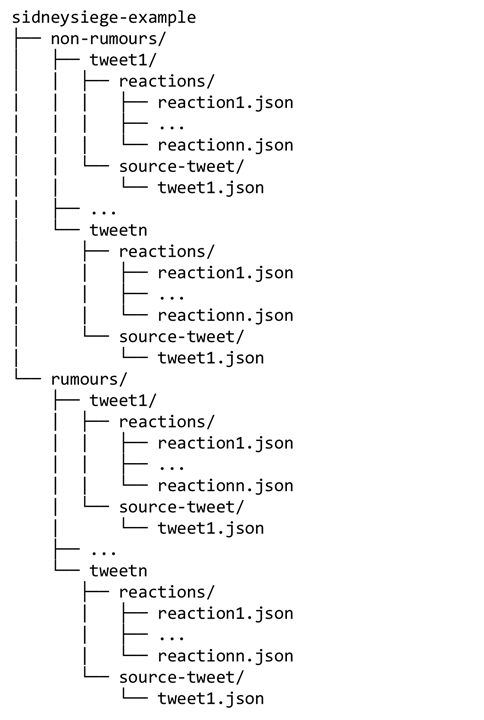

In [7]:
path = os.walk("sydneysiege-example")

for root, directories, files in path:
    for directory in directories:
        print(directory)
    for file in files:
        print(root,file)

non-rumours
rumours
544266241511133186
544268900351766528
reactions
source-tweet
sydneysiege-example\non-rumours\544266241511133186\reactions 544270066661851136.json
sydneysiege-example\non-rumours\544266241511133186\reactions 544273361334194176.json
sydneysiege-example\non-rumours\544266241511133186\reactions 544275366588588032.json
sydneysiege-example\non-rumours\544266241511133186\reactions 544276615316770816.json
sydneysiege-example\non-rumours\544266241511133186\reactions 544278115589976065.json
sydneysiege-example\non-rumours\544266241511133186\reactions 544281232477917184.json
sydneysiege-example\non-rumours\544266241511133186\reactions 544294761083858944.json
sydneysiege-example\non-rumours\544266241511133186\source-tweet 544266241511133186.json
reactions
source-tweet
sydneysiege-example\non-rumours\544268900351766528\reactions 544271046421921792.json
sydneysiege-example\non-rumours\544268900351766528\reactions 544273867175256064.json
sydneysiege-example\non-rumours\54426890035

### Acceder y recorrer un archivo ``.json``

La estructura de los archivos ``.json`` se define con:

*   Los datos se definen como pares ``objeto : valor``. 
*   Los objetos están separados por ``,``.
*   Los objetos se encierran entre ``{}``.
*   Los objetos pueden ser agrupados en secuencias ordenadas encerradas entre ``[]``. Por ejemplo ``[{},{}]``.
*   Los elementos deben estar encerrados entre comillas, a menos que representen elementos numéricos.

El siguiente ejemplo representa un objeto simple, sin anidamientos:

```
{ "name":"Chaya", "age":12, "city":"Boulder", "type":"Canine" }
```

Considerando una estructura un poco más compleja incluyendo anidamientos:

```
{
     "album_title" : "Yellow Submarine",     
     "release_year" : 1966,   
     "won_grammy" : False,
     "band" : "The Beatles",
     "album_sale": None
     "musicians" : ["John Lennon", "Paul McCartney", "George   Harrison", "Ringo Starr"],
     "studio" : {"studio_name": "Abbey Road Studios", "location": "London, England"}
     }
```

En este caso vamos a trabajar con un archivo correspondiente a un tweet de los que estaban en el ``.zip`` que descomprimimos anteriormente.


Al igual que con el ``.csv``, los ``.json`` pueden ser directamente cargados en un ``DataFrame`` de ``pandas``.

In [32]:
datapath = "./sydneysiege-example/non-rumours/544266241511133186/source-tweet/544266241511133186.json"
jsondf = pd.read_json(datapath)

print(jsondf.columns)
jsondf

Index(['contributors', 'truncated', 'text', 'in_reply_to_status_id', 'id',
       'favorite_count', 'source', 'retweeted', 'coordinates', 'entities',
       'in_reply_to_screen_name', 'id_str', 'retweet_count',
       'in_reply_to_user_id', 'favorited', 'user', 'geo',
       'in_reply_to_user_id_str', 'lang', 'created_at',
       'in_reply_to_status_id_str', 'place'],
      dtype='object')


,contributors,truncated,text,in_reply_to_status_id,id,favorite_count,source,retweeted,coordinates,entities,...,retweet_count,in_reply_to_user_id,favorited,user,geo,in_reply_to_user_id_str,lang,created_at,in_reply_to_status_id_str,place
symbols,NaN,False,A police operation is underway in Martin Place...,NaN,544266241511133186,47,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,[],...,248,NaN,False,NaN,NaN,NaN,en,2014-12-14 23:02:38+00:00,NaN,NaN
user_mentions,NaN,False,A police operation is underway in Martin Place...,NaN,544266241511133186,47,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,[],...,248,NaN,False,NaN,NaN,NaN,en,2014-12-14 23:02:38+00:00,NaN,NaN
hashtags,NaN,False,A police operation is underway in Martin Place...,NaN,544266241511133186,47,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,[],...,248,NaN,False,NaN,NaN,NaN,en,2014-12-14 23:02:38+00:00,NaN,NaN
urls,NaN,False,A police operation is underway in Martin Place...,NaN,544266241511133186,47,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,[],...,248,NaN,False,NaN,NaN,NaN,en,2014-12-14 23:02:38+00:00,NaN,NaN
follow_request_sent,NaN,False,A police operation is underway in Martin Place...,NaN,544266241511133186,47,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,NaN,...,248,NaN,False,False,NaN,NaN,en,2014-12-14 23:02:38+00:00,NaN,NaN
profile_use_background_image,NaN,False,A police operation is underway in Martin Place...,NaN,544266241511133186,47,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,NaN,...,248,NaN,False,True,NaN,NaN,en,2014-12-14 23:02:38+00:00,NaN,NaN
profile_text_color,NaN,False,A police operation is underway in Martin Place...,NaN,544266241511133186,47,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,NaN,...,248,NaN,False,333333,NaN,NaN,en,2014-12-14 23:02:38+00:00,NaN,NaN
default_profile_image,NaN,False,A police operation is underway in Martin Place...,NaN,544266241511133186,47,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,NaN,...,248,NaN,False,False,NaN,NaN,en,2014-12-14 23:02:38+00:00,NaN,NaN
id,NaN,False,A police operation is underway in Martin Place...,NaN,544266241511133186,47,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,NaN,...,248,NaN,False,23041630,NaN,NaN,en,2014-12-14 23:02:38+00:00,NaN,NaN
profile_background_image_url_https,NaN,False,A police operation is underway in Martin Place...,NaN,544266241511133186,47,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,NaN,NaN,...,248,NaN,False,https://pbs.twimg.com/profile_background_image...,NaN,NaN,en,2014-12-14 23:02:38+00:00,NaN,NaN


Pero, fíjense que la carga de forma directa no nos da como resultado lo que nosotros esperábamos. El ``.json`` que seleccionamos incluye un único tweet con todos sus atributos. Con lo que hubiésemos esperado obtener una fila con muchas columnas. Es necesario modificar la orientación para la carga del dataframe.

In [34]:
jsondf = pd.read_json(datapath,orient="index").T
jsondf = jsondf.set_index('id') # seteamos el id como index del frame
jsondf

,contributors,truncated,text,in_reply_to_status_id,favorite_count,source,retweeted,coordinates,entities,in_reply_to_screen_name,...,retweet_count,in_reply_to_user_id,favorited,user,geo,in_reply_to_user_id_str,lang,created_at,in_reply_to_status_id_str,place
id,,,,,,,,,,,,,,,,,,,,,
544266241511133186,None,False,A police operation is underway in Martin Place...,None,47,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,None,"{'symbols': [], 'user_mentions': [], 'hashtags...",None,...,248,None,False,"{'follow_request_sent': False, 'profile_use_ba...",None,None,en,Sun Dec 14 23:02:38 +0000 2014,None,None


In [35]:
print("Columns: ",jsondf.columns)
print("Rows: ",jsondf.index.values)

print("Text: ",jsondf['text']) #accedemos al texto (para todas las filas)

print("Entities: ",jsondf['entities']) # fíjense en este caso, que la estructura compleja la parseó como un dict, con lo que se puede acceder de forma directa

for row in jsondf['entities']:
    print(row)
    print("Hashtags: ",row['hashtags'])

Columns:  Index(['contributors', 'truncated', 'text', 'in_reply_to_status_id',
       'favorite_count', 'source', 'retweeted', 'coordinates', 'entities',
       'in_reply_to_screen_name', 'id_str', 'retweet_count',
       'in_reply_to_user_id', 'favorited', 'user', 'geo',
       'in_reply_to_user_id_str', 'lang', 'created_at',
       'in_reply_to_status_id_str', 'place'],
      dtype='object')
Rows:  [544266241511133186]
Text:  id
544266241511133186    A police operation is underway in Martin Place...
Name: text, dtype: object
Entities:  id
544266241511133186    {'symbols': [], 'user_mentions': [], 'hashtags...
Name: entities, dtype: object
{'symbols': [], 'user_mentions': [], 'hashtags': [], 'urls': []}
Hashtags:  []


Si quisiéramos, el ``.json`` podríamos parsearlo de forma directa:

In [36]:
import json

In [37]:
with open(datapath) as json_file:
    data = json.load(json_file)
    print(data)
    for x in data: # iteramos por todos los keys
        print(x,":",data[x]) # accedemos a los datos

{'contributors': None, 'truncated': False, 'text': "A police operation is underway in Martin Place, Sydney's CBD. People are advised to avoid the area.", 'in_reply_to_status_id': None, 'id': 544266241511133186, 'favorite_count': 47, 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'retweeted': False, 'coordinates': None, 'entities': {'symbols': [], 'user_mentions': [], 'hashtags': [], 'urls': []}, 'in_reply_to_screen_name': None, 'id_str': '544266241511133186', 'retweet_count': 248, 'in_reply_to_user_id': None, 'favorited': False, 'user': {'follow_request_sent': False, 'profile_use_background_image': True, 'profile_text_color': '333333', 'default_profile_image': False, 'id': 23041630, 'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/861571673/43de8d3823c7be6e0271612c5ebbef6f.jpeg', 'verified': True, 'profile_location': None, 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/543256331205894144/ot8C_tqJ_n

En caso de que se trate de un arreglo de objetos json.

In [49]:
array = '[\
    { "name":"Ford", "models":[ "Fiesta", "Focus", "Mustang" ] },\
    { "name":"BMW", "models":[ "320", "X3", "X5" ] },\
    { "name":"Fiat", "models":[ "500", "Panda" ] }\
  ]' # fíjense que las propiedades y valores están entre comillas dobles.

In [50]:
jarray = json.loads(array)
for js in jarray: # iteramos por cada uno de los objetos
    print(js) # accedemos a los datos de cada objeto

{'name': 'Ford', 'models': ['Fiesta', 'Focus', 'Mustang']}
{'name': 'BMW', 'models': ['320', 'X3', 'X5']}
{'name': 'Fiat', 'models': ['500', 'Panda']}


Para cargar un ``jsonarray`` en un dataframe, no hay que hacer nada especial, dado que pandas acepta como parámetro del constructor una lista de diccionarios:

In [54]:
listi = [x for x in jarray] # primero armamos
pd.DataFrame(jarray)

,name,models
0,Ford,"[Fiesta, Focus, Mustang]"
1,BMW,"[320, X3, X5]"
2,Fiat,"[500, Panda]"


Con esto es suficiente para procesar diferentes tipos de datos y arrancar el práctico!